In [1]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession
Spark=SparkSession.builder.appName("EEG").getOrCreate()

In [27]:
import pandas as pd
import seaborn as sn

In [6]:
ds=pd.read_csv("emotions.csv")

In [4]:
ds

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [5]:
ds.isnull()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2128,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
ds.notnull()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2128,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2129,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2130,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [8]:
new_data = ds.dropna(axis = 0, how ='any') 
print("Old data frame length:", len(ds))
print("New data frame length:", len(new_data))
print("Number of rows with at least 1 Null value: ", (len(ds)-len(new_data)))


Old data frame length: 2132
New data frame length: 2132
Number of rows with at least 1 Null value:  0


In [1]:
pd.set_option('display.max_columns', None)
ds.head()

NameError: name 'pd' is not defined

In [10]:
print(ds.label.value_counts())

NEUTRAL     716
POSITIVE    708
NEGATIVE    708
Name: label, dtype: int64


In [7]:
dataset=Spark.read.csv("EEG_Signals.csv", inferSchema=True,header=True)

In [12]:
dataset.head()

Row(# mean_0_a=4.62, mean_1_a=30.3, mean_2_a=-356.0, mean_3_a=15.6, mean_4_a=26.3, mean_d_0_a=1.07, mean_d_1_a=0.411, mean_d_2_a=-15.7, mean_d_3_a=2.06, mean_d_4_a=3.15, mean_d_0_a2=2.15, mean_d_1_a2=29.5, mean_d_2_a2=-353.0, mean_d_3_a2=14.4, mean_d_4_a2=21.5, mean_d_5_a=5.98, mean_d_6_a=30.7, mean_d_7_a=-343.0, mean_d_8_a=14.7, mean_d_9_a=27.9, mean_d_10_a=3.17, mean_d_11_a=32.2, mean_d_12_a=-368.0, mean_d_13_a=15.9, mean_d_14_a=36.4, mean_d_15_a=7.08, mean_d_16_a=28.8, mean_d_17_a=-359.0, mean_d_18_a=17.3, mean_d_19_a=19.6, mean_d_20_a=-3.83, mean_d_21_a=-1.23, mean_d_22_a=-10.8, mean_d_23_a=-0.363, mean_d_24_a=-6.41, mean_d_25_a=-1.03, mean_d_26_a=-2.78, mean_d_27_a=14.6, mean_d_28_a=-1.54, mean_d_29_a=-14.9, mean_d_30_a=-4.94, mean_d_31_a=0.664, mean_d_32_a=5.82, mean_d_33_a=-2.92, mean_d_34_a=1.9, mean_d_35_a=2.8, mean_d_36_a=-1.55, mean_d_37_a=25.5, mean_d_38_a=-1.18, mean_d_39_a=-8.51, mean_d_40_a=-1.11, mean_d_41_a=1.89, mean_d_42_a=16.6, mean_d_43_a=-2.55, mean_d_44_a=8.31, m

In [13]:
dataset

DataFrame[# mean_0_a: double, mean_1_a: double, mean_2_a: double, mean_3_a: double, mean_4_a: double, mean_d_0_a: double, mean_d_1_a: double, mean_d_2_a: double, mean_d_3_a: double, mean_d_4_a: double, mean_d_0_a2: double, mean_d_1_a2: double, mean_d_2_a2: double, mean_d_3_a2: double, mean_d_4_a2: double, mean_d_5_a: double, mean_d_6_a: double, mean_d_7_a: double, mean_d_8_a: double, mean_d_9_a: double, mean_d_10_a: double, mean_d_11_a: double, mean_d_12_a: double, mean_d_13_a: double, mean_d_14_a: double, mean_d_15_a: double, mean_d_16_a: double, mean_d_17_a: double, mean_d_18_a: double, mean_d_19_a: double, mean_d_20_a: double, mean_d_21_a: double, mean_d_22_a: double, mean_d_23_a: double, mean_d_24_a: double, mean_d_25_a: double, mean_d_26_a: double, mean_d_27_a: double, mean_d_28_a: double, mean_d_29_a: double, mean_d_30_a: double, mean_d_31_a: double, mean_d_32_a: double, mean_d_33_a: double, mean_d_34_a: double, mean_d_35_a: double, mean_d_36_a: double, mean_d_37_a: double, mean_

In [8]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [15]:
att=pd.read_csv("EEG_Signals1.csv")

In [16]:
for name in att:
    print('"{}",'.format(name),end=" ")

"# mean_0_a", "mean_1_a", "mean_2_a", "mean_3_a", "mean_4_a", "mean_d_0_a", "mean_d_1_a", "mean_d_2_a", "mean_d_3_a", "mean_d_4_a", "mean_d_0_a2", "mean_d_1_a2", "mean_d_2_a2", "mean_d_3_a2", "mean_d_4_a2", "mean_d_5_a", "mean_d_6_a", "mean_d_7_a", "mean_d_8_a", "mean_d_9_a", "mean_d_10_a", "mean_d_11_a", "mean_d_12_a", "mean_d_13_a", "mean_d_14_a", "mean_d_15_a", "mean_d_16_a", "mean_d_17_a", "mean_d_18_a", "mean_d_19_a", "mean_d_20_a", "mean_d_21_a", "mean_d_22_a", "mean_d_23_a", "mean_d_24_a", "mean_d_25_a", "mean_d_26_a", "mean_d_27_a", "mean_d_28_a", "mean_d_29_a", "mean_d_30_a", "mean_d_31_a", "mean_d_32_a", "mean_d_33_a", "mean_d_34_a", "mean_d_35_a", "mean_d_36_a", "mean_d_37_a", "mean_d_38_a", "mean_d_39_a", "mean_d_40_a", "mean_d_41_a", "mean_d_42_a", "mean_d_43_a", "mean_d_44_a", "mean_d_45_a", "mean_d_46_a", "mean_d_47_a", "mean_d_48_a", "mean_d_49_a", "stddev_0_a", "stddev_1_a", "stddev_2_a", "stddev_3_a", "stddev_4_a", "stddev_d_0_a", "stddev_d_1_a", "stddev_d_2_a", "stdd

In [9]:
vv = VectorAssembler(inputCols=["fft_338_b", "fft_339_b", "fft_340_b", "fft_341_b", "fft_342_b", "fft_343_b", "fft_344_b", "fft_345_b", "fft_346_b", "fft_347_b", "fft_348_b", "fft_349_b", "fft_350_b", "fft_351_b", "fft_352_b", "fft_353_b", "fft_354_b", "fft_355_b", "fft_356_b", "fft_357_b", "fft_358_b", "fft_359_b", "fft_360_b", "fft_361_b", "fft_362_b", "fft_363_b", "fft_364_b", "fft_365_b", "fft_366_b", "fft_367_b", "fft_368_b", "fft_369_b", "fft_370_b", "fft_371_b", "fft_372_b", "fft_373_b", "fft_374_b", "fft_375_b", "fft_376_b", "fft_377_b", "fft_378_b", "fft_379_b", "fft_380_b", "fft_381_b", "fft_382_b", "fft_383_b", "fft_384_b", "fft_385_b", "fft_386_b", "fft_387_b", "fft_388_b", "fft_389_b", "fft_390_b", "fft_391_b", "fft_392_b", "fft_393_b", "fft_394_b", "fft_395_b", "fft_396_b", "fft_397_b", "fft_398_b", "fft_399_b", "fft_400_b", "fft_401_b", "fft_402_b", "fft_403_b", "fft_404_b", "fft_405_b", "fft_406_b", "fft_407_b", "fft_408_b", "fft_409_b", "fft_410_b", "fft_411_b", "fft_412_b", "fft_413_b", "fft_414_b", "fft_415_b", "fft_416_b", "fft_417_b", "fft_418_b", "fft_419_b", "fft_420_b", "fft_421_b", "fft_422_b", "fft_423_b", "fft_424_b", "fft_425_b", "fft_426_b", "fft_427_b", "fft_428_b", "fft_429_b", "fft_430_b", "fft_431_b", "fft_432_b", "fft_433_b", "fft_434_b", "fft_435_b", "fft_436_b", "fft_437_b", "fft_438_b", "fft_439_b", "fft_440_b", "fft_441_b", "fft_442_b", "fft_443_b", "fft_444_b", "fft_445_b", "fft_446_b", "fft_447_b", "fft_448_b", "fft_449_b", "fft_450_b", "fft_451_b", "fft_452_b", "fft_453_b", "fft_454_b", "fft_455_b", "fft_456_b", "fft_457_b", "fft_458_b", "fft_459_b", "fft_460_b", "fft_461_b", "fft_462_b", "fft_463_b", "fft_464_b", "fft_465_b", "fft_466_b", "fft_467_b", "fft_468_b", "fft_469_b", "fft_470_b", "fft_471_b", "fft_472_b", "fft_473_b", "fft_474_b", "fft_475_b", "fft_476_b", "fft_477_b", "fft_478_b", "fft_479_b", "fft_480_b", "fft_481_b", "fft_482_b", "fft_483_b", "fft_484_b", "fft_485_b", "fft_486_b", "fft_487_b", "fft_488_b", "fft_489_b", "fft_490_b", "fft_491_b", "fft_492_b", "fft_493_b", "fft_494_b", "fft_495_b", "fft_496_b", "fft_497_b", "fft_498_b", "fft_499_b", "fft_500_b", "fft_501_b", "fft_502_b", "fft_503_b", "fft_504_b", "fft_505_b", "fft_506_b", "fft_507_b", "fft_508_b", "fft_509_b", "fft_510_b", "fft_511_b", "fft_512_b", "fft_513_b", "fft_514_b", "fft_515_b", "fft_516_b", "fft_517_b", "fft_518_b", "fft_519_b", "fft_520_b", "fft_521_b", "fft_522_b", "fft_523_b", "fft_524_b", "fft_525_b", "fft_526_b", "fft_527_b", "fft_528_b", "fft_529_b", "fft_530_b", "fft_531_b", "fft_532_b", "fft_533_b", "fft_534_b", "fft_535_b", "fft_536_b", "fft_537_b", "fft_538_b", "fft_539_b", "fft_540_b", "fft_541_b", "fft_542_b", "fft_543_b", "fft_544_b", "fft_545_b", "fft_546_b", "fft_547_b", "fft_548_b", "fft_549_b", "fft_550_b", "fft_551_b", "fft_552_b", "fft_553_b", "fft_554_b", "fft_555_b", "fft_556_b", "fft_557_b", "fft_558_b", "fft_559_b", "fft_560_b", "fft_561_b", "fft_562_b", "fft_563_b", "fft_564_b", "fft_565_b", "fft_566_b", "fft_567_b", "fft_568_b", "fft_569_b", "fft_570_b", "fft_571_b", "fft_572_b", "fft_573_b", "fft_574_b", "fft_575_b", "fft_576_b", "fft_577_b", "fft_578_b", "fft_579_b", "fft_580_b", "fft_581_b", "fft_582_b", "fft_583_b", "fft_584_b", "fft_585_b", "fft_586_b", "fft_587_b", "fft_588_b", "fft_589_b", "fft_590_b", "fft_591_b", "fft_592_b", "fft_593_b", "fft_594_b", "fft_595_b", "fft_596_b", "fft_597_b", "fft_598_b", "fft_599_b", "fft_600_b", "fft_601_b", "fft_602_b", "fft_603_b", "fft_604_b", "fft_605_b", "fft_606_b", "fft_607_b", "fft_608_b", "fft_609_b", "fft_610_b", "fft_611_b", "fft_612_b", "fft_613_b", "fft_614_b", "fft_615_b", "fft_616_b", "fft_617_b", "fft_618_b", "fft_619_b", "fft_620_b", "fft_621_b", "fft_622_b", "fft_623_b", "fft_624_b", "fft_625_b", "fft_626_b", "fft_627_b", "fft_628_b", "fft_629_b", "fft_630_b", "fft_631_b", "fft_632_b", "fft_633_b", "fft_634_b", "fft_635_b", "fft_636_b", "fft_637_b", "fft_638_b", "fft_639_b", "fft_640_b", "fft_641_b", "fft_642_b", "fft_643_b", "fft_644_b", "fft_645_b", "fft_646_b", "fft_647_b", "fft_648_b", "fft_649_b", "fft_650_b", "fft_651_b", "fft_652_b", "fft_653_b", "fft_654_b", "fft_655_b", "fft_656_b", "fft_657_b", "fft_658_b", "fft_659_b", "fft_660_b", "fft_661_b", "fft_662_b", "fft_663_b", "fft_664_b", "fft_665_b", "fft_666_b", "fft_667_b", "fft_668_b", "fft_669_b", "fft_670_b", "fft_671_b", "fft_672_b", "fft_673_b", "fft_674_b", "fft_675_b", "fft_676_b", "fft_677_b", "fft_678_b", "fft_679_b", "fft_680_b", "fft_681_b", "fft_682_b", "fft_683_b", "fft_684_b", "fft_685_b", "fft_686_b", "fft_687_b", "fft_688_b", "fft_689_b", "fft_690_b", "fft_691_b", "fft_692_b", "fft_693_b", "fft_694_b", "fft_695_b", "fft_696_b", "fft_697_b", "fft_698_b", "fft_699_b", "fft_700_b", "fft_701_b", "fft_702_b", "fft_703_b", "fft_704_b", "fft_705_b", "fft_706_b", "fft_707_b", "fft_708_b", "fft_709_b", "fft_710_b", "fft_711_b", "fft_712_b", "fft_713_b", "fft_714_b", "fft_715_b", "fft_716_b", "fft_717_b", "fft_718_b", "fft_719_b", "fft_720_b", "fft_721_b", "fft_722_b", "fft_723_b", "fft_724_b", "fft_725_b", "fft_726_b", "fft_727_b", "fft_728_b", "fft_729_b", "fft_730_b", "fft_731_b", "fft_732_b", "fft_733_b", "fft_734_b", "fft_735_b", "fft_736_b", "fft_737_b", "fft_738_b", "fft_739_b", "fft_740_b", "fft_741_b", "fft_742_b", "fft_743_b", "fft_744_b", "fft_745_b", "fft_746_b", "fft_747_b", "fft_748_b", "fft_749_b"], outputCol="MT")

In [10]:
vv1=vv.transform(dataset)

In [19]:
vv1

DataFrame[# mean_0_a: double, mean_1_a: double, mean_2_a: double, mean_3_a: double, mean_4_a: double, mean_d_0_a: double, mean_d_1_a: double, mean_d_2_a: double, mean_d_3_a: double, mean_d_4_a: double, mean_d_0_a2: double, mean_d_1_a2: double, mean_d_2_a2: double, mean_d_3_a2: double, mean_d_4_a2: double, mean_d_5_a: double, mean_d_6_a: double, mean_d_7_a: double, mean_d_8_a: double, mean_d_9_a: double, mean_d_10_a: double, mean_d_11_a: double, mean_d_12_a: double, mean_d_13_a: double, mean_d_14_a: double, mean_d_15_a: double, mean_d_16_a: double, mean_d_17_a: double, mean_d_18_a: double, mean_d_19_a: double, mean_d_20_a: double, mean_d_21_a: double, mean_d_22_a: double, mean_d_23_a: double, mean_d_24_a: double, mean_d_25_a: double, mean_d_26_a: double, mean_d_27_a: double, mean_d_28_a: double, mean_d_29_a: double, mean_d_30_a: double, mean_d_31_a: double, mean_d_32_a: double, mean_d_33_a: double, mean_d_34_a: double, mean_d_35_a: double, mean_d_36_a: double, mean_d_37_a: double, mean_

In [11]:
final_table=vv1.select("MT","label")
final_table.show()

+--------------------+-----+
|                  MT|label|
+--------------------+-----+
|[-73.5,152.0,-506...|    2|
|[43.7,-1.78,106.0...|    0|
|[-151.0,281.0,-22...|    1|
|[-140.0,201.0,35....|    1|
|[34.7,18.7,144.0,...|    0|
|[34.7,16.1,188.0,...|    0|
|[-47.3,-49.3,143....|    1|
|[93.4,-242.0,-413...|    2|
|[-25.4,-22.8,185....|    0|
|[-137.0,439.0,28....|    2|
|[4.66,-13.8,106.0...|    1|
|[-57.2,120.0,-87....|    2|
|[-4.23,-9.54,161....|    0|
|[-56.3,30.3,290.0...|    2|
|[-22.4,-9.5,200.0...|    0|
|[-124.0,230.0,-26...|    2|
|[27.8,7.54,136.0,...|    1|
|[4.02,-17.9,117.0...|    0|
|[-400.0,811.0,-75...|    2|
|[-89.3,294.0,202....|    2|
+--------------------+-----+
only showing top 20 rows



In [12]:
tr,ts=final_table.randomSplit([0.75,0.25], seed=1496)

In [13]:
#Random forest classifier 
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [14]:
rf=RandomForestClassifier(featuresCol="MT",labelCol="label",numTrees=20,maxDepth=5,seed=1996)
rf1=rf.fit(tr)

In [21]:
rf2=rf1.transform(ts)

In [22]:
rf2.select("MT","label","prediction").show()

+--------------------+-----+----------+
|                  MT|label|prediction|
+--------------------+-----+----------+
|[-256.0,405.0,20....|    2|       1.0|
|[-255.0,586.0,-37...|    1|       2.0|
|[-250.0,626.0,161...|    2|       2.0|
|[-246.0,-23.9,-18...|    0|       0.0|
|[-227.0,434.0,-66...|    2|       2.0|
|[-211.0,447.0,-31...|    2|       2.0|
|[-208.0,368.0,104...|    2|       2.0|
|[-194.0,413.0,-42...|    2|       2.0|
|[-191.0,448.0,-26...|    1|       2.0|
|[-189.0,304.0,-15...|    1|       1.0|
|[-178.0,298.0,284...|    2|       2.0|
|[-151.0,377.0,490...|    2|       2.0|
|[-134.0,250.0,140...|    2|       2.0|
|[-109.0,176.0,-18...|    2|       2.0|
|[-75.9,112.0,139....|    1|       2.0|
|[-62.2,38.9,79.6,...|    1|       0.0|
|[-59.0,9.01,218.0...|    2|       2.0|
|[-47.3,-49.3,143....|    1|       1.0|
|[-34.8,127.0,193....|    2|       2.0|
|[-30.4,9.68,202.0...|    0|       0.0|
+--------------------+-----+----------+
only showing top 20 rows



In [15]:
rf3=MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [24]:
rf4= rf3.evaluate(rf2)

In [25]:
print("Accuracy = ", rf4)

Accuracy =  0.9090909090909091


In [28]:
#Random forest classifier
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from time import *

In [17]:
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(final_table)

In [18]:
featureIndexer =\
    VectorIndexer(inputCol="MT", outputCol="indexedFeatures", maxCategories=4).fit(final_table)

In [39]:
start = time()
tm = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10, seed=1496)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, tm, labelConverter])
model = pipeline.fit(tr)
stop = time()
print("Random forest model training time = {} seconds".format(stop-start))

Random forest model training time = 1.3678643703460693 seconds


In [20]:
predictions = model.transform(ts)

In [21]:
predictions.select("predictedLabel", "label", "MT").show()

+--------------+-----+--------------------+
|predictedLabel|label|                  MT|
+--------------+-----+--------------------+
|             2|    2|[-256.0,405.0,20....|
|             2|    1|[-255.0,586.0,-37...|
|             2|    2|[-250.0,626.0,161...|
|             0|    0|[-246.0,-23.9,-18...|
|             2|    2|[-227.0,434.0,-66...|
|             2|    2|[-211.0,447.0,-31...|
|             1|    2|[-208.0,368.0,104...|
|             2|    2|[-194.0,413.0,-42...|
|             2|    1|[-191.0,448.0,-26...|
|             1|    1|[-189.0,304.0,-15...|
|             1|    2|[-178.0,298.0,284...|
|             1|    2|[-151.0,377.0,490...|
|             2|    2|[-134.0,250.0,140...|
|             2|    2|[-109.0,176.0,-18...|
|             2|    1|[-75.9,112.0,139....|
|             1|    1|[-62.2,38.9,79.6,...|
|             2|    2|[-59.0,9.01,218.0...|
|             1|    1|[-47.3,-49.3,143....|
|             2|    2|[-34.8,127.0,193....|
|             0|    0|[-30.4,9.6

In [22]:
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

rfModel = model.stages[2]
print(rfModel) 
print("Accuracy = ", accuracy)

Test Error = 0.0853432
RandomForestClassificationModel: uid=RandomForestClassifier_c15582150bca, numTrees=10, numClasses=3, numFeatures=412
Accuracy =  0.9146567717996289


In [68]:
#confusion matrix random forest classifier 
import sklearn
predictions_train = model.transform(tr)
y_true = predictions_train.select(['label']).collect()
y_pred = predictions_train.select(['prediction']).collect()
classes = ["Neutral", "Positive","Negative"]

from sklearn.metrics import classification_report, confusion_matrix
conf=classification_report(y_true, y_pred)
print(conf)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       532
           1       0.96      0.84      0.89       538
           2       0.88      0.98      0.93       523

    accuracy                           0.93      1593
   macro avg       0.93      0.93      0.93      1593
weighted avg       0.93      0.93      0.93      1593



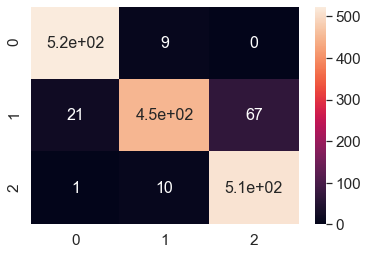

In [69]:
cm=confusion_matrix(y_true, y_pred)
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

In [37]:
#Decision Tree Classifier
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [51]:
start=time()
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", seed=1496) 
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])
model1 = pipeline.fit(tr)
stop = time()
print("decision tree model training time = {} seconds".format(stop-start))

decision tree model training time = 1.4299745559692383 seconds


In [52]:
predictions = model1.transform(ts)

In [53]:
predictions.select("prediction", "indexedLabel", "MT").show()

+----------+------------+--------------------+
|prediction|indexedLabel|                  MT|
+----------+------------+--------------------+
|       2.0|         2.0|[-256.0,405.0,20....|
|       2.0|         1.0|[-255.0,586.0,-37...|
|       2.0|         2.0|[-250.0,626.0,161...|
|       0.0|         0.0|[-246.0,-23.9,-18...|
|       2.0|         2.0|[-227.0,434.0,-66...|
|       2.0|         2.0|[-211.0,447.0,-31...|
|       2.0|         2.0|[-208.0,368.0,104...|
|       2.0|         2.0|[-194.0,413.0,-42...|
|       2.0|         1.0|[-191.0,448.0,-26...|
|       1.0|         1.0|[-189.0,304.0,-15...|
|       2.0|         2.0|[-178.0,298.0,284...|
|       1.0|         2.0|[-151.0,377.0,490...|
|       2.0|         2.0|[-134.0,250.0,140...|
|       2.0|         2.0|[-109.0,176.0,-18...|
|       2.0|         1.0|[-75.9,112.0,139....|
|       1.0|         1.0|[-62.2,38.9,79.6,...|
|       2.0|         2.0|[-59.0,9.01,218.0...|
|       1.0|         1.0|[-47.3,-49.3,143....|
|       2.0| 

In [54]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model1.stages[2]
print(treeModel)
print("Accuracy = ", accuracy)

Test Error = 0.137291 
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_76afe492511d, depth=5, numNodes=53, numClasses=3, numFeatures=412
Accuracy =  0.862708719851577


In [66]:
#confusion matrix decision tree classifier
import sklearn
predictions_train = model1.transform(tr)
y_true = predictions_train.select(['label']).collect()
y_pred = predictions_train.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       532
           1       0.91      0.89      0.90       538
           2       0.92      0.96      0.94       523

    accuracy                           0.93      1593
   macro avg       0.93      0.93      0.93      1593
weighted avg       0.93      0.93      0.93      1593



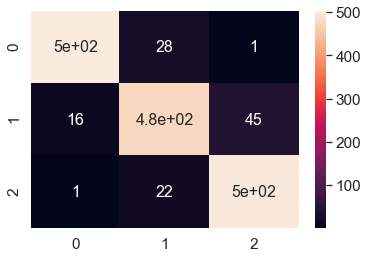

In [67]:
cm=confusion_matrix(y_true, y_pred)
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

In [57]:
#Multinomial Logistic Regression
from pyspark.ml.classification import LogisticRegression

In [58]:
start= time()
lr = LogisticRegression(featuresCol='MT',labelCol='label', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(final_table)
stop = time()
print("multinomial logistic regression model training time = {} seconds".format(stop-start))

multinomial logistic regression model training time = 3.9215376377105713 seconds


In [59]:
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

Coefficients: 
3 X 412 CSRMatrix
(1,8) 0.0
(2,11) 0.0
(2,23) 0.0
(2,26) 0.0
(2,38) 0.0
(2,41) 0.0
(2,53) 0.0
(2,56) 0.0
(2,67) -0.0
(2,68) 0.0001
(2,71) 0.0001
(2,83) 0.0
(2,86) 0.0
(2,98) 0.0
(2,101) 0.0
(2,113) 0.0
..
..
Intercept: [0.018576689029195365,0.0018122841164258847,-0.020388973145621252]


In [60]:
trainingSummary = lrModel.summary

In [61]:
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

objectiveHistory:
1.0985982261135627
1.0978329831888323
1.0969484008136625
1.096405514047824
1.0960008417491052
1.0958838935844701
1.0958146075318969
1.0955718283574678
1.0953765817761378
1.0951307113203987
1.0946792264737135


In [62]:
accuracy = trainingSummary.accuracy
print("Accuracy = ", accuracy)

Accuracy =  0.6228893058161351


In [70]:
#confusion matrix multinomial logistic regression
import sklearn
predictions_train = lrModel.transform(tr)
y_true = predictions_train.select(['label']).collect()
y_pred = predictions_train.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       532
           1       0.00      0.00      0.00       538
           2       0.77      0.85      0.81       523

    accuracy                           0.61      1593
   macro avg       0.43      0.62      0.50      1593
weighted avg       0.43      0.61      0.50      1593



[[532   0   0]
 [405   0 133]
 [ 76   0 447]]


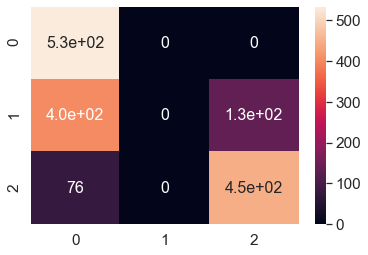

In [71]:
cm=confusion_matrix(y_true, y_pred)
print(cm)
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()